<a href="https://colab.research.google.com/github/tonyjoo974/mask-rcnn-using-synthetic-models/blob/master/CS_543_term_project_synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install keras==2.2.5
%tensorflow_version 1.x

!pip install h5py==2.10.0

# The h5py package is an interface to the HDF5 binary data format. HDF5 lets you store 
# huge amounts of numerical data, and easily manipulate that data

     |████████████████████████████████| 336 kB 7.8 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.5 which is incompatible.
TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 8.6 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [3]:
!ls "/content/drive/My Drive/"

 bridge1_sn_053_0019
 bridge3_altamont
'Colab Notebooks'
'Contact Information.gform'
 CrackDataset_with_its_utils.py
 Cracked-Concrete-Foundation.png
 cracked_concrete.jpg
 crack_segmentation_dataset.zip
 custom.py
 dataset
 Dataset
 Dataset_May25
 Dataset_May31
 Eval1
 Eval2
 ezgif-4-1e38a58969a0-jpg
 ezgif-7-7b4b885ca912-jpg
 ezgif-7-b5d1826b6e2c-jpg
 ezgif-7-e2d5004f2482-jpg
 field_3
 final_vid
 June_2nd
 June_2nd1
 June_2nd_2
 June_2nd_3
 June_2nd_4
 June_2nd_5
 Kabir.jpg.png
 logs
 MaskRCNN
 mask_rcnn_coco.h5
 mask_rcnn_damage_0010.h5
 mrcnn_error.pdf
 msrcnn_nov_9.zip
 output
 output1
 output2
 output_4
 output_5
 output_final
 output_final2
 output_final3
 output_final4
 output_final5
 __pycache__
 real_water
 spoon
'Survey Questionnaires: Concrete Sealers .gform'
 synthetic_cracks_april26_update
 synthetic_cracks_april26.zip
 synthetic_data_update_10pm.zip
 synthetic_nov10.zip
 test1_nov_9.zip
 testoutput
 utils.py
 validation
 WaterDataset_with_its_utils.py


In [4]:
pwd

'/content'

In [5]:
!cp -f '/content/drive/My Drive/synthetic_nov10.zip' /content

In [6]:
!unzip /content/synthetic_nov10.zip

Archive:  /content/synthetic_nov10.zip
   creating: synthetic_nov10/images/
  inflating: synthetic_nov10/images/aSlide1.JPG  
  inflating: synthetic_nov10/images/aSlide10.JPG  
  inflating: synthetic_nov10/images/aSlide100.JPG  
  inflating: synthetic_nov10/images/aSlide101.JPG  
  inflating: synthetic_nov10/images/aSlide102.JPG  
  inflating: synthetic_nov10/images/aSlide103.JPG  
  inflating: synthetic_nov10/images/aSlide104.JPG  
  inflating: synthetic_nov10/images/aSlide105.JPG  
  inflating: synthetic_nov10/images/aSlide106.JPG  
  inflating: synthetic_nov10/images/aSlide107.JPG  
  inflating: synthetic_nov10/images/aSlide108.JPG  
  inflating: synthetic_nov10/images/aSlide109.JPG  
  inflating: synthetic_nov10/images/aSlide11.JPG  
  inflating: synthetic_nov10/images/aSlide110.JPG  
  inflating: synthetic_nov10/images/aSlide111.JPG  
  inflating: synthetic_nov10/images/aSlide112.JPG  
  inflating: synthetic_nov10/images/aSlide113.JPG  
  inflating: synthetic_nov10/images/aSlide11

In [7]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 29.81 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [8]:
%tensorflow_version 1.x

import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)

1.15.2
2.3.1


Using TensorFlow backend.


In [9]:
%cd /content/Mask_RCNN

import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = '/content/drive/My Drive/'

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

/content/Mask_RCNN


In [10]:
from WaterDataset_with_its_utils import WaterDataset

In [11]:
class WaterConfig(Config):

    # Give the configuration a recognizable name
    NAME = "water"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 1 water (class)

   
    # Our training image size is (448, 448)
    
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256

    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    # Train 64 top ROI's

    TRAIN_ROIS_PER_IMAGE = 64


    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 150  # 300 to get frequent reading from tensorboard, after each epoch

    VALIDATION_STEPS = 75
    
config = WaterConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [12]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [13]:
!ls "/content/"

drive  Mask_RCNN  sample_data  synthetic_nov10	synthetic_nov10.zip


In [14]:
pwd

'/content/Mask_RCNN'

In [15]:
!ls "/content/"

drive  Mask_RCNN  sample_data  synthetic_nov10	synthetic_nov10.zip


In [16]:
!ls "/content/drive/MyDrive/

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [17]:
train_dir = '/content/synthetic_nov10/train'
test_dir = '/content/synthetic_nov10/test'

# Training dataset
dataset_train = WaterDataset(utils.Dataset)
dataset_train.load_dataset(train_dir)
dataset_train.prepare()

# Validation dataset
dataset_val = WaterDataset(utils.Dataset)
dataset_val.load_dataset(test_dir)
dataset_val.prepare()

In [18]:
pwd

'/content/Mask_RCNN'

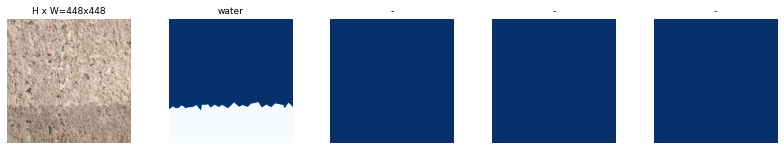

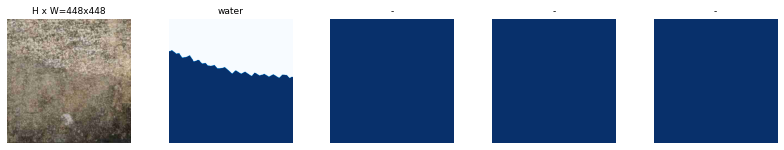

In [19]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 2)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [20]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [21]:
#model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
COCO_WEIGHTS_PATH = "mask_rcnn_coco.h5"
model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

In [22]:
model.keras_model.metrics_tensors = []
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(MODEL_DIR)

In [23]:
 history=model.train(dataset_train, dataset_val, custom_callbacks = [tensorboard_callback], learning_rate=config.LEARNING_RATE, epochs=15, layers="4+")

# Model trained upto XX epochs



Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/logs/water20211111T0104/mask_rcnn_water_{epoch:04d}.h5
Selecting layers to train
res4a_branch2a         (Conv2D)
bn4a_branch2a          (BatchNorm)
res4a_branch2b         (Conv2D)
bn4a_branch2b          (BatchNorm)
res4a_branch2c         (Conv2D)
res4a_branch1          (Conv2D)
bn4a_branch2c          (BatchNorm)
bn4a_branch1           (BatchNorm)
res4b_branch2a         (Conv2D)
bn4b_branch2a          (BatchNorm)
res4b_branch2b         (Conv2D)
bn4b_branch2b          (BatchNorm)
res4b_branch2c         (Conv2D)
bn4b_branch2c          (BatchNorm)
res4c_branch2a         (Conv2D)
bn4c_branch2a          (BatchNorm)
res4c_branch2b         (Conv2D)
bn4c_branch2b          (BatchNorm)
res4c_branch2c         (Conv2D)
bn4c_branch2c          (BatchNorm)
res4d_branch2a         (Conv2D)
bn4d_branch2a          (BatchNorm)
res4d_branch2b         (Conv2D)
bn4d_branch2b          (BatchNorm)
res4d_branch2c         (Conv2D)
bn4d_branc

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/tensorflow-1.15.2/python3.7/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/15
150/150 [==============================] - 123s 818ms/step - loss: 0.9103 - val_loss: 33.6060

Epoch 2/15
150/150 [==============================] - 84s 558ms/step - loss: 0.2284 - val_loss: 25.5461
Epoch 3/15
150/150 [==============================] - 94s 629ms/step - loss: 0.2223 - val_loss: 26.0208
Epoch 4/15
150/150 [==============================] - 94s 629ms/step - loss: 0.1543 - val_loss: 20.4598
Epoch 5/15
150/150 [==============================] - 95s 631ms/step - loss: 0.1373 - val_loss: 25.4354
Epoch 6/15
150/150 [==============================] - 95s 630ms/step - loss: 0.1323 - val_loss: 23.9143
Epoch 7/15
150/150 [==============================] - 94s 629ms/step - loss: 0.1316 - val_loss: 22.8814
Epoch 8/15
150/150 [==============================] - 95s 631ms/step - loss: 0.1325 - val_loss: 22.5952
Epoch 9/15
150/150 [==============================] - 94s 628ms/step - loss: 0.1047 - val_loss: 23.8328
Epoch 10/15
150/150 [==============================] - 94s 628

In [52]:
class InferenceConfig(WaterConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.95

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/My Drive/logs/water20211111T0104/mask_rcnn_water_0015.h5
Re-starting from epoch 15


original_image           shape: (256, 256, 3)         min:   59.00000  max:  252.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  448.00000  float64
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:    0.00000  max:  256.00000  int32
gt_mask                  shape: (256, 256, 1)         min:    0.00000  max:    1.00000  uint8


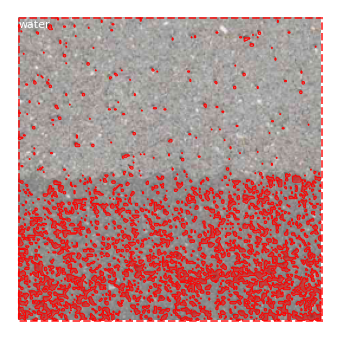

In [57]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(6, 6))

In [54]:
%cd /content/drive/MyDrive/real_water

/content/drive/MyDrive/real_water


In [55]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Processing 1 images
image                    shape: (448, 448, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -113.80000  max:  137.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  448.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.70988  max:    1.45890  float32


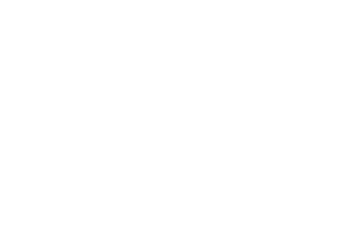

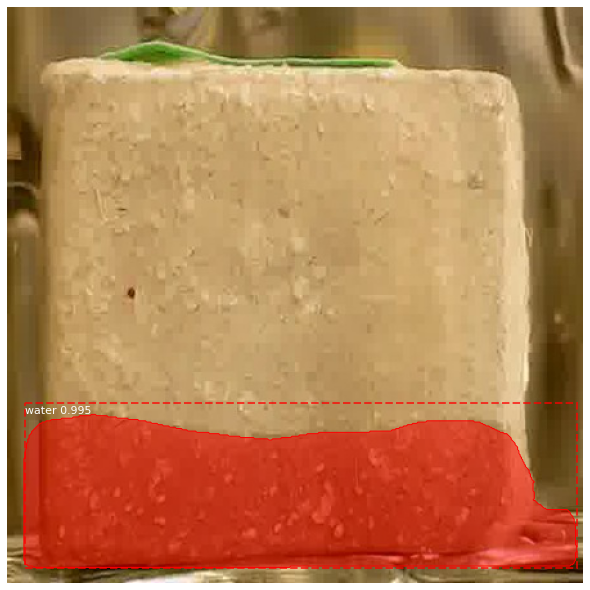

In [56]:
import skimage
image=skimage.io.imread("020a.jpg")
    #  Remove alpha channel, if it has one
if image.shape[-1] == 4:
      image = image[..., :3]

results = model.detect([image], verbose=1)
r = results[0]
plt.axis('off')

# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())
    

# save_results_to = '/content/drive/MyDrive/bridge3_altamont/%d'%(id_img)

plt.autoscale(tight=True)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
              hspace = 0, wspace = 0)
plt.margins(0,0)  

# plt.savefig(f"{save_results_to}/%d.png"%(i), bbox_inches = 'tight', transparent = True, pad_inches = 0)